## ANÁLISIS DE INFORMACIÓN METEOROLÓGICA DEL SENAMHI
##### CURSO: ANÁLISIS DE DATOSAMBIENTALES CON PYTHON I

##### AUTOR: https://github.com/marvinjonathcn 

- #### NOTA: El siguiente código fue desarrollado en python 3.8.5. Antes de ejecutar los scripts se deben instalar las librerías necesarias. 

### 1. INSTALACIÓN E IMPORTACIÓN DE LAS LIBRERÍAS

In [1]:
# INSTALAR LAS LIBRERIAS NECESARIAS PARA LA EJECUCIÓN DEL SCRIPT

import sys
print(sys.version)

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


In [6]:
# IMPORTAMOS LAS LIBRERIAS A USAR 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


import pandas_profiling
import glob
import seaborn as sns
import missingno as msno
import statsmodels.api as sm

### 2. IMPORTACIÓN DE LAS BASES DE DATOS

In [9]:
# IMPORTAMOS NUESTRAS BASES DE DATOS Y LAS CONCATENAMOS EN UNA SOLA

path = r'C:\Users\Asus\Desktop\CIMMA\PYTHON\CLASE2\DATA\EST-MET-CAMPMART' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col = None, header = 8, na_values = "S/D")
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

df.head(10)

AÑO / MES / DÍA   HORA  TEMPERATURA (°C)  PRECIPITACIÓN (mm/hora)  \
0      2016/05/01  00:00              19.9                      0.0   
1      2016/05/01  01:00              19.4                      0.0   
2      2016/05/01  02:00              18.8                      0.0   
3      2016/05/01  03:00              18.6                      0.0   
4      2016/05/01  04:00              18.6                      0.0   
5      2016/05/01  05:00              19.2                      0.0   
6      2016/05/01  06:00              18.9                      0.0   
7      2016/05/01  07:00              19.7                      0.0   
8      2016/05/01  08:00              23.1                      0.0   
9      2016/05/01  09:00              24.2                      0.0   

   HUMEDAD (%)  DIRECCION DEL VIENTO (°)  VELOCIDAD DEL VIENTO (m/s)  
0         81.0                     271.0                         1.1  
1         83.0                      12.0                         0.1  
2         85.0                     245.0                         0.0  
3         88.0                      59.0                         0.2  
4         88.0                     317.0                         0.0  
5         86.0                     197.0                         1.3  
6         85.0                     134.0                         0.0  
7         87.0                      59.0                         0.0  
8         71.0                      92.0                         0.7  
9         67.0                     212.0                         3.0

### 3. CONVERSIÓN DE FORMATOS Y MANIPULACIÓN DEL DATAFRAME

In [10]:
# MODIFICAMOS Y ASIGNAMOS EL FORMARO DE FECHA A NUESTRO DATAFRAME

df['Date'] = pd.to_datetime(df[['AÑO / MES / DÍA','HORA']]
                   .astype(str).apply(' '.join, 1), format='%Y/%m/%d %H:%M')

df.set_index('Date', inplace=True)
df.drop(df.columns[[0,1]], axis=1, inplace=True)

df.sort_values(by='Date', inplace=True)

df.head(10)

TEMPERATURA (°C)  PRECIPITACIÓN (mm/hora)  HUMEDAD (%)  \
Date                                                                          
2016-05-01 00:00:00              19.9                      0.0         81.0   
2016-05-01 01:00:00              19.4                      0.0         83.0   
2016-05-01 02:00:00              18.8                      0.0         85.0   
2016-05-01 03:00:00              18.6                      0.0         88.0   
2016-05-01 04:00:00              18.6                      0.0         88.0   
2016-05-01 05:00:00              19.2                      0.0         86.0   
2016-05-01 06:00:00              18.9                      0.0         85.0   
2016-05-01 07:00:00              19.7                      0.0         87.0   
2016-05-01 08:00:00              23.1                      0.0         71.0   
2016-05-01 09:00:00              24.2                      0.0         67.0   

                     DIRECCION DEL VIENTO (°)  VELOCIDAD DEL VIENTO (m/s)  
Date                                                                       
2016-05-01 00:00:00                     271.0                         1.1  
2016-05-01 01:00:00                      12.0                         0.1  
2016-05-01 02:00:00                     245.0                         0.0  
2016-05-01 03:00:00                      59.0                         0.2  
2016-05-01 04:00:00                     317.0                         0.0  
2016-05-01 05:00:00                     197.0                         1.3  
2016-05-01 06:00:00                     134.0                         0.0  
2016-05-01 07:00:00                      59.0                         0.0  
2016-05-01 08:00:00                      92.0                         0.7  
2016-05-01 09:00:00                     212.0                         3.0

In [12]:
# IMPORTAR BASE DE DATOS

df.to_csv('campo-de-marte-datahm.csv', index=True)

In [42]:
df.dtypes

TEMPERATURA (°C)              float64
PRECIPITACIÓN (mm/hora)       float64
HUMEDAD (%)                   float64
DIRECCION DEL VIENTO (°)      float64
VELOCIDAD DEL VIENTO (m/s)    float64
dtype: object

### 4. ANÁLISIS DE LOS DATOS

In [43]:
df.profile_report()

<AxesSubplot:>

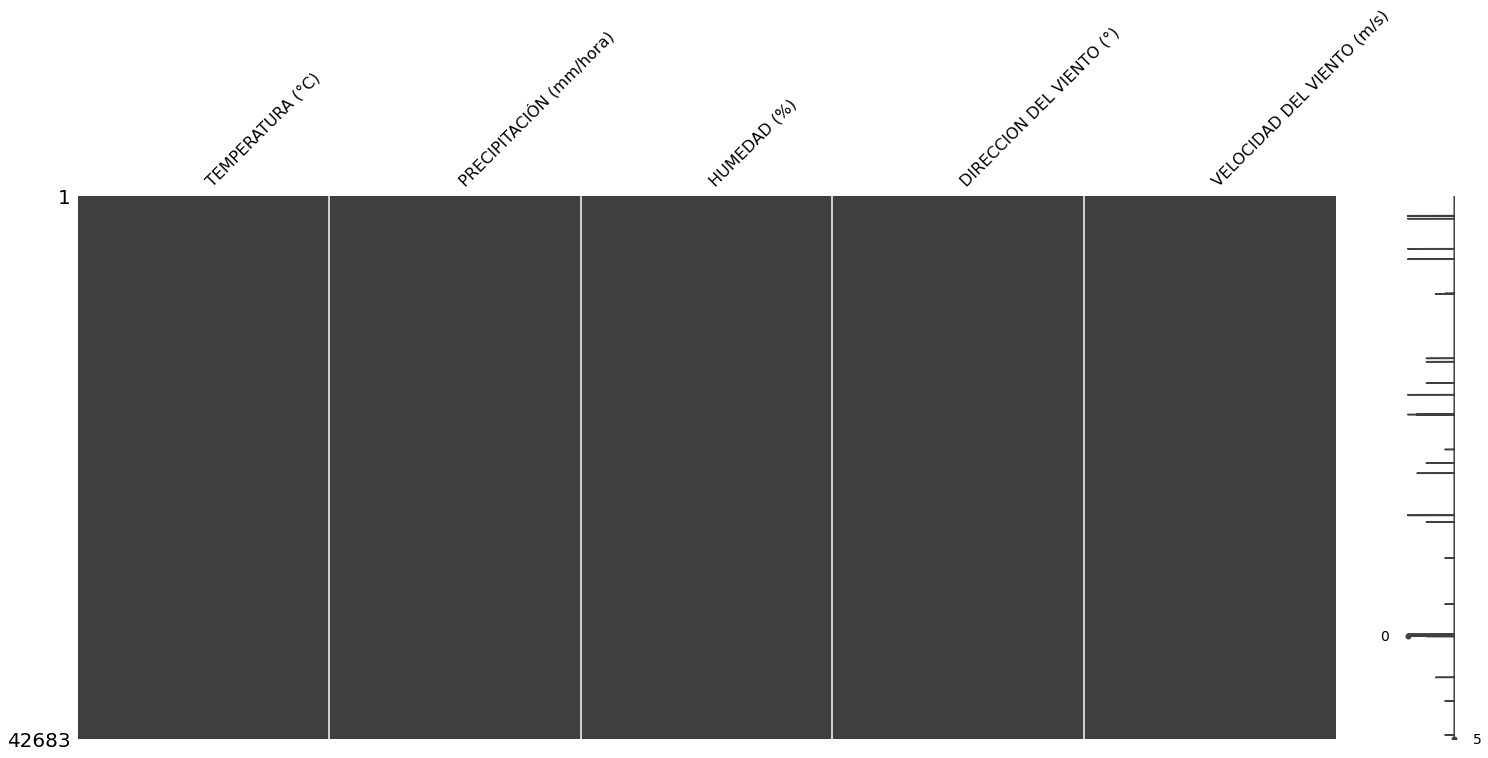

In [44]:
# NUMERO DE MISSING POR COLUMNA

msno.matrix(df.iloc[:,0:5]) 

In [45]:
# NUMERO DE MISSING POR COLUMNA

df.isnull().sum()

TEMPERATURA (°C)              35
PRECIPITACIÓN (mm/hora)       58
HUMEDAD (%)                   37
DIRECCION DEL VIENTO (°)      52
VELOCIDAD DEL VIENTO (m/s)    49
dtype: int64

In [46]:
pd.date_range(start = '2016-05-01 00:00', end = '2021-03-31 23:00', freq="60min").difference(df.index)

DatetimeIndex(['2016-05-03 22:00:00', '2016-05-03 23:00:00',
               '2016-06-22 12:00:00', '2016-06-22 13:00:00',
               '2016-06-22 14:00:00', '2016-06-22 15:00:00',
               '2016-06-22 16:00:00', '2016-06-22 17:00:00',
               '2016-06-22 18:00:00', '2016-06-22 19:00:00',
               ...
               '2020-04-30 03:00:00', '2020-04-30 04:00:00',
               '2020-09-10 07:00:00', '2020-11-17 20:00:00',
               '2020-11-19 21:00:00', '2020-11-25 10:00:00',
               '2020-12-02 09:00:00', '2020-12-02 17:00:00',
               '2020-12-04 16:00:00', '2020-12-23 11:00:00'],
              dtype='datetime64[ns]', length=421, freq=None)

In [47]:
# AÑADIENDO LAS HORAS FALTANTES A LA BASE DE DATOS

df = df.resample('H').first().fillna(np.nan)

pd.date_range(start = '2016-05-01 00:00', end = '2021-03-31 23:00', freq="60min").difference(df.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [48]:
# OBSERVAR FECHAS FALTANTES AÑADIDAS

df.iloc[60:80,:]

TEMPERATURA (°C)  PRECIPITACIÓN (mm/hora)  HUMEDAD (%)  \
Date                                                                          
2016-05-03 12:00:00              26.2                      0.0         61.0   
2016-05-03 13:00:00              22.8                      0.0         75.0   
2016-05-03 14:00:00              22.0                      0.0         77.0   
2016-05-03 15:00:00              22.7                      0.0         75.0   
2016-05-03 16:00:00              22.3                      0.0         78.0   
2016-05-03 17:00:00              21.0                      0.0         83.0   
2016-05-03 18:00:00              20.2                      0.0         86.0   
2016-05-03 19:00:00              19.4                      0.0         90.0   
2016-05-03 20:00:00              19.6                      0.0         90.0   
2016-05-03 21:00:00              19.7                      0.0         89.0   
2016-05-03 22:00:00               NaN                      NaN          NaN   
2016-05-03 23:00:00               NaN                      NaN          NaN   
2016-05-04 00:00:00              19.6                      0.0         90.0   
2016-05-04 01:00:00              19.3                      0.0         89.0   
2016-05-04 02:00:00              19.1                      0.0         91.0   
2016-05-04 03:00:00              19.0                      0.0         92.0   
2016-05-04 04:00:00              18.9                      0.0         94.0   
2016-05-04 05:00:00              18.7                      0.0         94.0   
2016-05-04 06:00:00              19.0                      0.0         93.0   
2016-05-04 07:00:00              18.8                      0.0         94.0   

                     DIRECCION DEL VIENTO (°)  VELOCIDAD DEL VIENTO (m/s)  
Date                                                                       
2016-05-03 12:00:00                     196.0                         3.9  
2016-05-03 13:00:00                     201.0                         3.0  
2016-05-03 14:00:00                     201.0                         4.0  
2016-05-03 15:00:00                     219.0                         3.3  
2016-05-03 16:00:00                     210.0                         3.5  
2016-05-03 17:00:00                     219.0                         3.0  
2016-05-03 18:00:00                     212.0                         2.6  
2016-05-03 19:00:00                     217.0                         2.5  
2016-05-03 20:00:00                     218.0                         1.6  
2016-05-03 21:00:00                     214.0                         2.1  
2016-05-03 22:00:00                       NaN                         NaN  
2016-05-03 23:00:00                       NaN                         NaN  
2016-05-04 00:00:00                     219.0                         1.9  
2016-05-04 01:00:00                     223.0                         1.6  
2016-05-04 02:00:00                     213.0                         1.6  
2016-05-04 03:00:00                     220.0                         2.1  
2016-05-04 04:00:00                     215.0                         2.0  
2016-05-04 05:00:00                     342.0                         0.1  
2016-05-04 06:00:00                     206.0                         1.8  
2016-05-04 07:00:00                     242.0                         0.8

<AxesSubplot:>

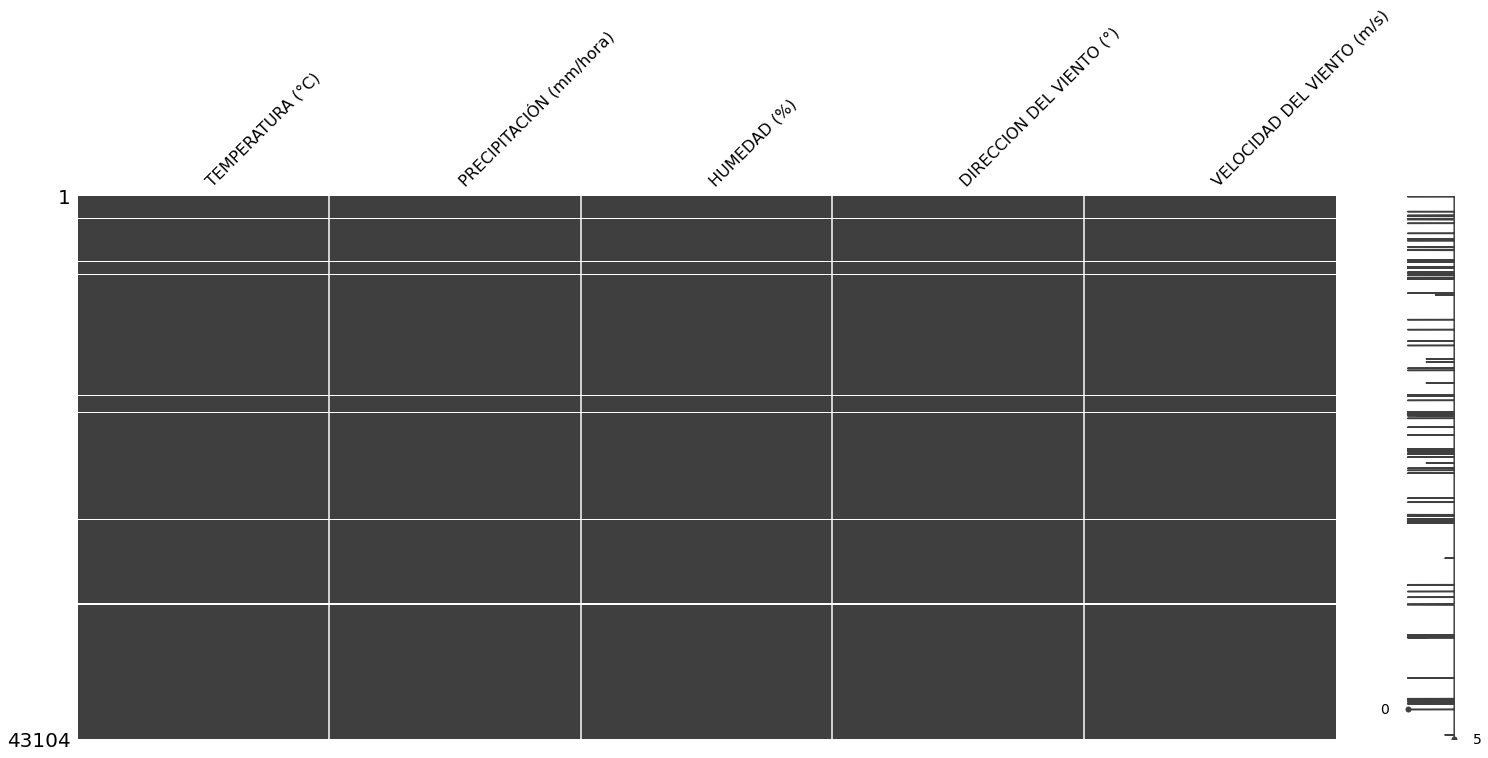

In [49]:
# NUMERO DE MISSING POR COLUMNA

msno.matrix(df.iloc[:,0:5]) 

In [50]:
# NUMERO DE MISSING POR COLUMNA

df.isnull().sum()

TEMPERATURA (°C)              456
PRECIPITACIÓN (mm/hora)       479
HUMEDAD (%)                   458
DIRECCION DEL VIENTO (°)      473
VELOCIDAD DEL VIENTO (m/s)    470
dtype: int64

In [51]:
# OPCIONAL COMPLETAR DATOS FALTANTES

df['TEMPERATURA (°C)'].interpolate(inplace=True)

df.isnull().sum()

TEMPERATURA (°C)                0
PRECIPITACIÓN (mm/hora)       479
HUMEDAD (%)                   458
DIRECCION DEL VIENTO (°)      473
VELOCIDAD DEL VIENTO (m/s)    470
dtype: int64

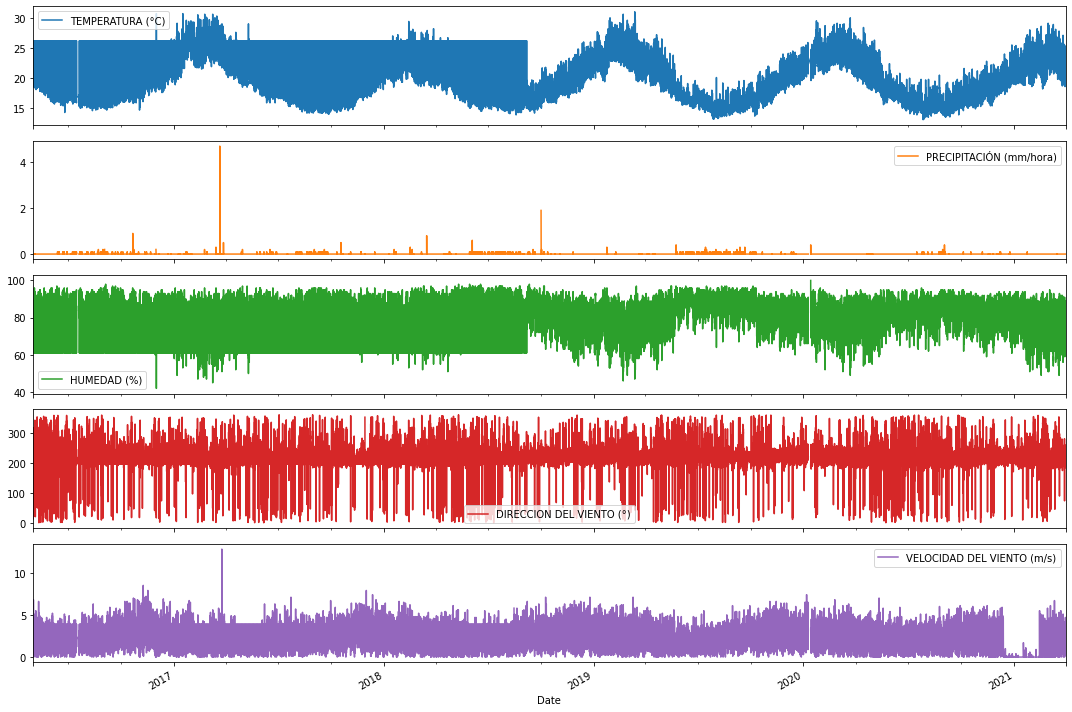

In [52]:
# BOXPLOT PARA NUESTROS DATOS

df.plot(figsize=(15,10), subplots = True)

plt.tight_layout()
plt.show()

<AxesSubplot:>

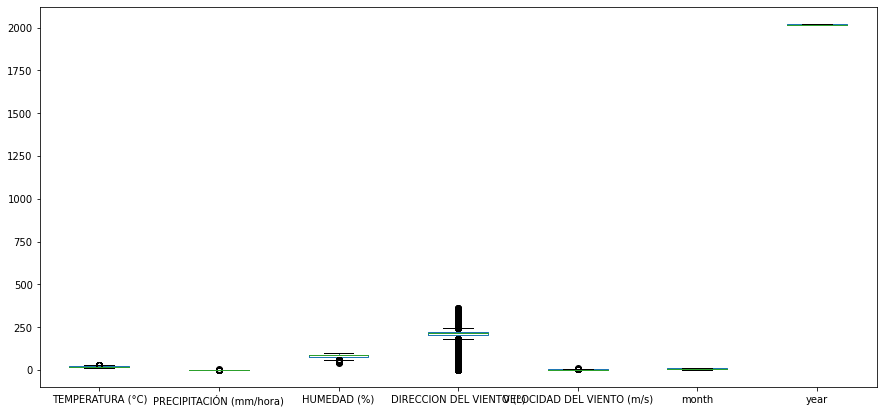

In [57]:
# BOXPLOT PARA NUESTROS DATOS

df.plot.box(figsize=(15,7))

In [58]:
# OBTENER EL RANGO INTERCUARTIL (IQR)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

IQR

TEMPERATURA (°C)               5.4
PRECIPITACIÓN (mm/hora)        0.0
HUMEDAD (%)                   12.0
DIRECCION DEL VIENTO (°)      16.0
VELOCIDAD DEL VIENTO (m/s)     1.7
month                          7.0
year                           3.0
dtype: float64

In [53]:
# GRAFICAMOS SOLO LA TEMPERATURA DE MANERA INTERACTIVA

fig = px.scatter(df, y="TEMPERATURA (°C)", 
                 title='TEMPERATURA HORARIA DE LA ESTACIÓN CAMPO DE MARTE, LIMA')
fig.show()

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



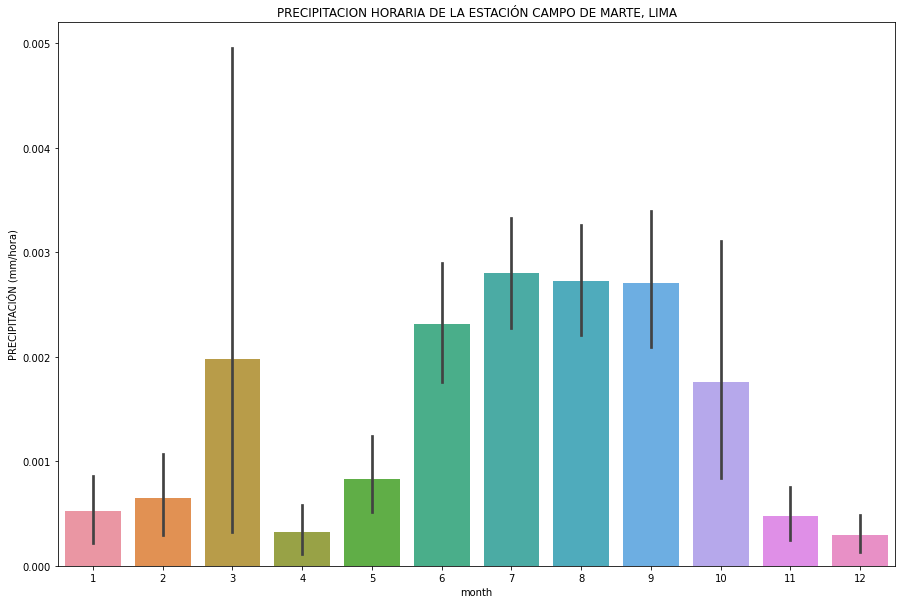

In [54]:
# CREAMOS DOS COLUMNAS ADICIONALES PARA EL ANÁLISIS TEMPORAL

df['month'] = df.index.month 
df['year'] = df.index.year

plt.figure(figsize=(15,10))
sns.barplot(df['month'], df.iloc[:,1])
plt.title('PRECIPITACION HORARIA DE LA ESTACIÓN CAMPO DE MARTE, LIMA')
plt.show()

In [55]:
# OBTENER PROMEDIOS MENSUALES

g = df.groupby(["year", "month"])
monthly_averages = g.aggregate({"TEMPERATURA (°C)":np.mean})
monthly_averages.head(10)

TEMPERATURA (°C)
year month                  
2016 5             19.742473
     6             17.468194
     7             17.324059
     8             16.704570
     9             17.075556
     10            18.225336
     11            19.582847
     12            21.052218
2017 1             24.086559
     2             24.974256

In [56]:
# OBTENER PROMEDIOS ANUALES

f = df.groupby(["year"])
anual_averages = f.aggregate({"TEMPERATURA (°C)":np.mean})
anual_averages.head(10)

TEMPERATURA (°C)
year                  
2016         18.401250
2017         19.984726
2018         19.201615
2019         19.217500
2020         19.112990
2021         22.299769

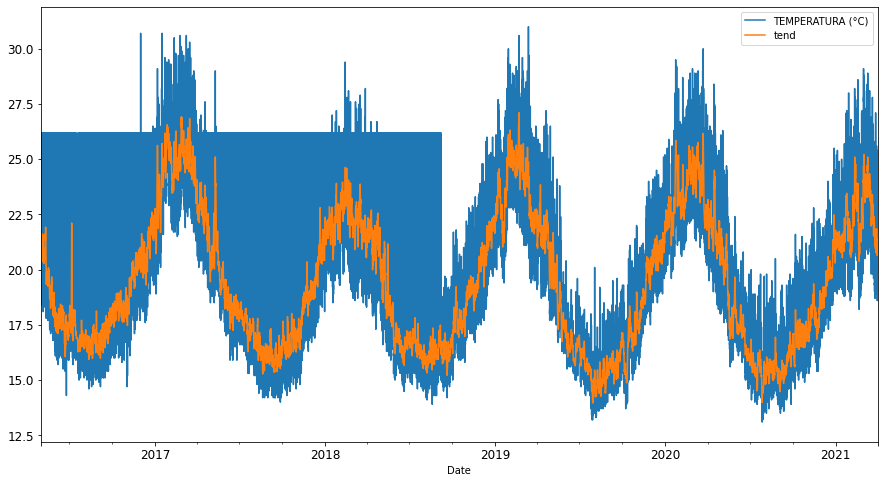

In [84]:
# GRAFICAR LA TENDENCIA 
ciclo, tend = sm.tsa.filters.hpfilter(df['TEMPERATURA (°C)'])
df['tend'] = tend

df[['TEMPERATURA (°C)', 'tend']].plot(figsize=(15, 8), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);